# Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpig
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10
from keras.models import Sequential, Model
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import Dense, Input
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras import callbacks
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import torch, torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import time
from torchsummary import summary
import os
from PIL import Image
from torchvision.datasets import CIFAR10
from torch.utils.data import random_split
from google.colab import drive

# Part 1 : CNN

In [ ]:
def model_preparing(model, in_shape, conv_layer_num, active_func, active_func_last, opt, LOSS, P_BN, drop_out):
  for i in range(conv_layer_num):
    model.add(Conv2D(input_shape = in_shape, filters = 32 * (2 ** (int(i/2))), kernel_size = (3,3), padding = "same", activation = active_func))
    if P_BN:
      model.add(MaxPooling2D())
      model.add(BatchNormalization())
    model.add(Dropout(drop_out))
  model.add(Flatten())
  model.add(Dense(64, activation = active_func))
  model.add(Dense(10, activation = active_func_last))
  model.compile(loss = LOSS, optimizer = opt, metrics = ["accuracy"])
  return model

def print_metric(model, model_info, y_te, x_te, y_pr):
  y_pr = np.argmax(y_pr, axis = 1)

  plt.figure()
  plt.plot(model_info.history["loss"], color = "b")
  plt.plot(model_info.history["val_loss"], color = "r")
  plt.legend(["train", "validation"], loc = "upper left")
  plt.title("Loss Score")
  plt.show()

  plt.figure()
  plt.plot(model_info.history["accuracy"], color = "b")
  plt.plot(model_info.history["val_accuracy"], color = "r")
  plt.legend(["train", "validation"], loc = "upper left")
  plt.title("Accuracy Score")
  plt.show()

  score = model.evaluate(x_te, to_categorical(y_te), verbose = 0)
  print("\nAccuracy :", score[1])
  print("\nLoss :", score[0])
  print("\nConfusion Matrix :")
  print(confusion_matrix(y_te, y_pr))

In [ ]:
(x_tr, y_tr), (x_te, y_te) = cifar10.load_data()
x_tr, x_val, y_tr, y_val = train_test_split(x_tr, y_tr, random_state = 0, shuffle = True, train_size = 0.9)

y_tr, y_val= to_categorical(y_tr), to_categorical(y_val)
x_tr = np.reshape(x_tr.astype("float32") / 255.0, (len(x_tr), 32, 32, 3))
x_te = np.reshape(x_te.astype("float32") / 255.0, (len(x_te), 32, 32, 3))
x_val = np.reshape(x_val.astype("float32") / 255.0, (len(x_val), 32, 32, 3))

**Only CNN**

In [ ]:
model = model_preparing(Sequential(), np.shape(x_tr[0]), 3, "relu", "softmax", "adam", "categorical_crossentropy", False, 0)
model_info = model.fit(x_tr, y_tr, validation_data = (x_val, y_val), epochs = 30, batch_size = 32)

Epoch 1/30
1407/1407 [==============================] - 25s 17ms/step - loss: 1.4526 - accuracy: 0.4792 - val_loss: 1.1500 - val_accuracy: 0.5882
Epoch 2/30
1407/1407 [==============================] - 28s 20ms/step - loss: 0.9947 - accuracy: 0.6522 - val_loss: 0.9727 - val_accuracy: 0.6562
Epoch 3/30
1407/1407 [==============================] - 27s 19ms/step - loss: 0.7454 - accuracy: 0.7403 - val_loss: 1.0332 - val_accuracy: 0.6456
Epoch 4/30
1407/1407 [==============================] - 27s 19ms/step - loss: 0.5229 - accuracy: 0.8196 - val_loss: 1.0585 - val_accuracy: 0.6546
Epoch 5/30
1407/1407 [==============================] - 26s 18ms/step - loss: 0.3194 - accuracy: 0.8890 - val_loss: 1.2930 - val_accuracy: 0.6400
Epoch 6/30
1407/1407 [==============================] - 25s 17ms/step - loss: 0.1883 - accuracy: 0.9355 - val_loss: 1.6080 - val_accuracy: 0.6296
Epoch 7/30
1407/1407 [==============================] - 25s 18ms/step - loss: 0.1262 - accuracy: 0.9563 - val_loss: 2.0156 -

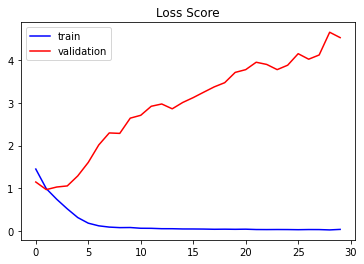

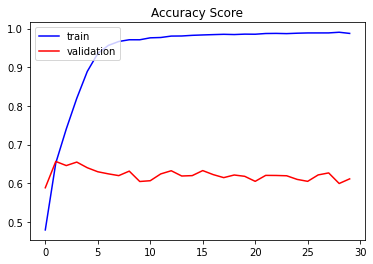


Accuracy : 0.6122999787330627

Loss : 4.61508321762085

Confusion Matrix :
[[644  19 107  34  20   4   7  17 112  36]
 [ 30 726  21  23   4   7   7   9  51 122]
 [ 73   8 539  99  86  65  43  43  31  13]
 [ 35  26 136 422  62 189  58  31  23  18]
 [ 32   7 124  99 507  69  57  80  18   7]
 [ 15  11 109 193  47 526  20  55  15   9]
 [ 10  16 108  88  48  53 651  10  11   5]
 [ 21   6  69  78  66  61   7 665   7  20]
 [ 96  48  27  18  10   7   5   3 752  34]
 [ 51 100  29  34   9  11   5  29  41 691]]


In [ ]:
y_pr = model.predict(x_te, verbose = 0)
pred = np.argmax(y_pr, axis = 1)
print_metric(model, model_info, y_te, x_te, y_pr)

CNN with Max Pooling and Batch Normalization

In [ ]:
model = model_preparing(Sequential(), np.shape(x_tr[0]), 3, "relu", "softmax", "adam", "categorical_crossentropy", True, 0)
model_info = model.fit(x_tr, y_tr, validation_data = (x_val, y_val), epochs = 30, batch_size = 32)

Epoch 1/30
1407/1407 [==============================] - 12s 8ms/step - loss: 1.3004 - accuracy: 0.5387 - val_loss: 1.3090 - val_accuracy: 0.5562
Epoch 2/30
1407/1407 [==============================] - 10s 7ms/step - loss: 0.9302 - accuracy: 0.6719 - val_loss: 0.9923 - val_accuracy: 0.6530
Epoch 3/30
1407/1407 [==============================] - 10s 7ms/step - loss: 0.7664 - accuracy: 0.7316 - val_loss: 0.9366 - val_accuracy: 0.6744
Epoch 4/30
1407/1407 [==============================] - 10s 7ms/step - loss: 0.6645 - accuracy: 0.7685 - val_loss: 1.0428 - val_accuracy: 0.6552
Epoch 5/30
1407/1407 [==============================] - 10s 7ms/step - loss: 0.5812 - accuracy: 0.7974 - val_loss: 0.8183 - val_accuracy: 0.7214
Epoch 6/30
1407/1407 [==============================] - 10s 7ms/step - loss: 0.5160 - accuracy: 0.8187 - val_loss: 0.8675 - val_accuracy: 0.7130
Epoch 7/30
1407/1407 [==============================] - 10s 7ms/step - loss: 0.4545 - accuracy: 0.8408 - val_loss: 0.9273 - val_ac

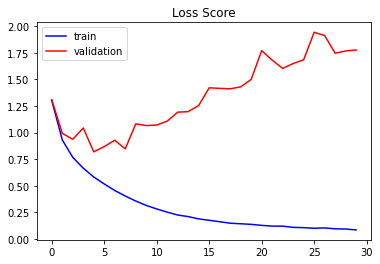

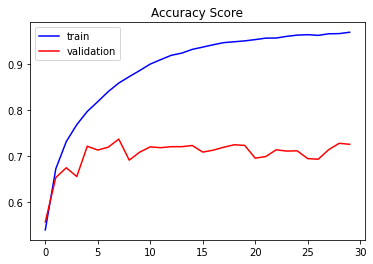


Accuracy : 0.7231000065803528

Loss : 1.8117170333862305

Confusion Matrix :
[[720  26  60  39  19  12  12  10  64  38]
 [ 15 858   6   7   2   4  11   0  19  78]
 [ 65   5 598  88  64  62  70  32  11   5]
 [ 23  14  54 545  49 187  58  35  16  19]
 [ 17   9  79  68 650  63  50  54   6   4]
 [ 13   4  40 165  36 641  35  48  12   6]
 [  6   4  33  59  26  29 821   5   8   9]
 [ 14   6  17  51  50  64  13 763   7  15]
 [ 53  25  15  18   6  11   6   7 831  28]
 [ 28  95   8  10   3   6   4  16  26 804]]


In [ ]:
y_pr = model.predict(x_te, verbose = 0)
pred = np.argmax(y_pr, axis = 1)
print_metric(model, model_info, y_te, x_te, y_pr)

CNN with Max Pooling and Batch Normalization and Dropout

In [ ]:
model = model_preparing(Sequential(), np.shape(x_tr[0]), 3, "relu", "softmax", "adam", "categorical_crossentropy", True, 0.25)
model_info = model.fit(x_tr, y_tr, validation_data = (x_val, y_val), epochs = 30, batch_size = 32)

Epoch 1/30
1407/1407 [==============================] - 13s 8ms/step - loss: 1.4908 - accuracy: 0.4670 - val_loss: 1.2848 - val_accuracy: 0.5322
Epoch 2/30
1407/1407 [==============================] - 11s 8ms/step - loss: 1.1356 - accuracy: 0.5948 - val_loss: 1.0138 - val_accuracy: 0.6404
Epoch 3/30
1407/1407 [==============================] - 11s 8ms/step - loss: 0.9885 - accuracy: 0.6485 - val_loss: 0.9232 - val_accuracy: 0.6654
Epoch 4/30
1407/1407 [==============================] - 11s 8ms/step - loss: 0.9005 - accuracy: 0.6804 - val_loss: 1.1297 - val_accuracy: 0.6328
Epoch 5/30
1407/1407 [==============================] - 11s 8ms/step - loss: 0.8432 - accuracy: 0.7031 - val_loss: 1.0665 - val_accuracy: 0.6506
Epoch 6/30
1407/1407 [==============================] - 11s 8ms/step - loss: 0.7994 - accuracy: 0.7171 - val_loss: 0.7869 - val_accuracy: 0.7246
Epoch 7/30
1407/1407 [==============================] - 11s 8ms/step - loss: 0.7660 - accuracy: 0.7297 - val_loss: 0.9281 - val_ac

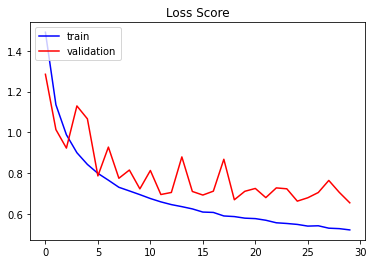

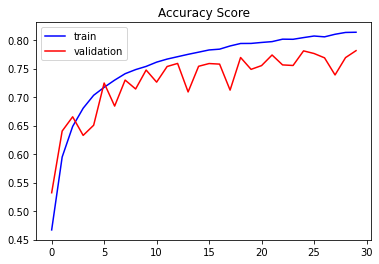


Accuracy : 0.7818999886512756

Loss : 0.6670661568641663

Confusion Matrix :
[[843  13  17  11  20   3   3  17  50  23]
 [ 15 880   1   5   1   3   4   6  19  66]
 [ 74   2 601  32 108  84  34  40  16   9]
 [ 30   6  28 505  79 186  55  74  20  17]
 [ 10   5  28  21 802  27  19  75  12   1]
 [ 14   1  15 123  47 695  20  64  15   6]
 [  6   8  27  29  37  17 854  12   7   3]
 [  9   1  13  14  35  39   4 875   5   5]
 [ 43  23   3   4   8   7   2   3 892  15]
 [ 16  45   6  10   2   5   2  14  28 872]]


In [ ]:
y_pr = model.predict(x_te, verbose = 0)
pred = np.argmax(y_pr, axis = 1)
print_metric(model, model_info, y_te, x_te, y_pr)

In [ ]:
model = model_preparing(Sequential(), np.shape(x_tr[0]), 3, "relu", "softmax", "adam", "categorical_crossentropy", True, 0.25)
earlystopping = callbacks.EarlyStopping(monitor = "val_loss", mode ="min", patience = 5, restore_best_weights = True)
model_info = model.fit(x_tr, y_tr, validation_data =(x_val, y_val), epochs = 30, batch_size = 32, callbacks = [earlystopping])

Epoch 1/30
1407/1407 [==============================] - 12s 8ms/step - loss: 1.4854 - accuracy: 0.4697 - val_loss: 1.1951 - val_accuracy: 0.5704
Epoch 2/30
1407/1407 [==============================] - 11s 8ms/step - loss: 1.1365 - accuracy: 0.5971 - val_loss: 1.3662 - val_accuracy: 0.5330
Epoch 3/30
1407/1407 [==============================] - 11s 8ms/step - loss: 0.9982 - accuracy: 0.6460 - val_loss: 1.0504 - val_accuracy: 0.6394
Epoch 4/30
1407/1407 [==============================] - 11s 8ms/step - loss: 0.9138 - accuracy: 0.6769 - val_loss: 0.8700 - val_accuracy: 0.6928
Epoch 5/30
1407/1407 [==============================] - 11s 8ms/step - loss: 0.8519 - accuracy: 0.6989 - val_loss: 0.9825 - val_accuracy: 0.6564
Epoch 6/30
1407/1407 [==============================] - 11s 8ms/step - loss: 0.8083 - accuracy: 0.7146 - val_loss: 0.8270 - val_accuracy: 0.7106
Epoch 7/30
1407/1407 [==============================] - 11s 8ms/step - loss: 0.7716 - accuracy: 0.7294 - val_loss: 0.7743 - val_ac

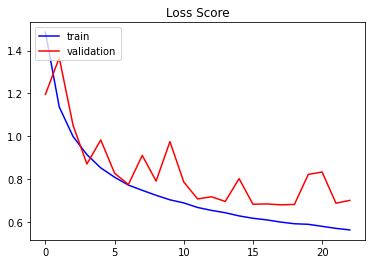

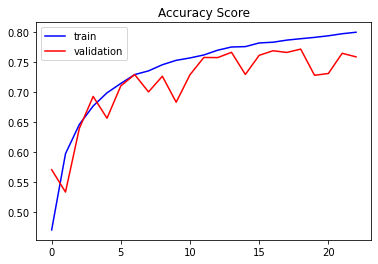


Accuracy : 0.760200023651123

Loss : 0.702659547328949

Confusion Matrix :
[[757   7  47  21  35   8   6  10  80  29]
 [ 20 785   4   3   6   6   7   5  23 141]
 [ 40   5 651  42  99  59  53  26  13  12]
 [ 12   6  42 555  89 148  68  38  20  22]
 [  9   1  43  30 805  27  18  50  15   2]
 [  7   2  41 148  56 653  29  44  13   7]
 [  3   6  27  40  69  18 817   6   8   6]
 [  6   0  19  33  64  38   5 819   9   7]
 [ 30  15  10   9   7   2   6   2 896  23]
 [ 31  36   4  11   2   4   3  13  32 864]]


In [ ]:
y_pr = model.predict(x_te, verbose = 0)
pred = np.argmax(y_pr, axis = 1)
print_metric(model, model_info, y_te, x_te, y_pr)

# Part 2 : Transfer Learning

**testing the Alexnet**

In [ ]:
def three_most(model, prep, image):
  image_tensor = prep(image).unsqueeze(0)
  prediction_tensor = model(image_tensor)
  three_max_classes = torch.argsort(prediction_tensor, 1)[0][-3:]

  plt.figure()
  plt.imshow(image)
  plt.axis("off")
  plt.show()

  print("\nFirst Class Number : ", three_max_classes.numpy()[2])
  print("First Class Name : ", labels[three_max_classes.numpy()[2]])
  print("\nSecond Class Number : ", three_max_classes.numpy()[1])
  print("Second Class Name : ", labels[three_max_classes.numpy()[1]])
  print("\nThird Class Number : ", three_max_classes.numpy()[0])
  print("Third Class Name : ", labels[three_max_classes.numpy()[0]])

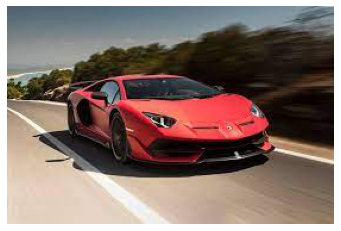


First Class Number :  817
First Class Name :  sports car, sport car

Second Class Number :  511
Second Class Name :  convertible

Third Class Number :  573
Third Class Name :  go-kart




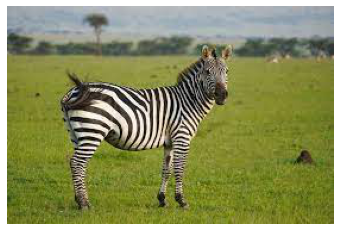


First Class Number :  340
First Class Name :  zebra

Second Class Number :  351
Second Class Name :  hartebeest

Third Class Number :  352
Third Class Name :  impala, Aepyceros melampus


In [47]:
alexnet = models.alexnet(pretrained = True)
alexnet.eval()

preprocess = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224), transforms.ToTensor(), transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])])
with open("imagenet.txt") as f:
  labels = [line.strip() for line in f.readlines()]


image1 = Image.open("c.jfif")
three_most(alexnet, preprocess, image1)
print("\n")
image2 = Image.open("z.jfif")
three_most(alexnet, preprocess, image2)

**transfer learning using Alexnet**

In [ ]:
def train_and_validate(model, loss_criterion, optimizer, train_data, valid_data, BS, epochs):
  train_data_loader = DataLoader(train_data, batch_size = BS, shuffle = True)
  valid_data_loader = DataLoader(valid_data, batch_size = BS, shuffle = True)
  
  history = []

  for epoch in range(epochs):
      model.train()

      train_loss = 0.0
      train_acc = 0.0
      valid_loss = 0.0
      valid_acc = 0.0
      
      for i, (inputs, labels) in enumerate(train_data_loader):
          optimizer.zero_grad()
          outputs = model(inputs)
          
          loss = loss_criterion(outputs, labels)
          loss.backward()
          train_loss += loss.item() * inputs.size(0)
          
          ret, predictions = torch.max(outputs.data, 1)
          acc = torch.mean(predictions.eq(labels.data.view_as(predictions)).type(torch.FloatTensor))
          train_acc += acc.item() * inputs.size(0)

          optimizer.step()

      with torch.no_grad():
          model.eval()

          for j, (inputs, labels) in enumerate(valid_data_loader):
              outputs = model(inputs)
              loss = loss_criterion(outputs, labels)
              valid_loss += loss.item() * inputs.size(0)

              ret, predictions = torch.max(outputs.data, 1)
              acc = torch.mean(predictions.eq(labels.data.view_as(predictions)).type(torch.FloatTensor))
              valid_acc += acc.item() * inputs.size(0)

      avg_train_loss = train_loss / len(train_data) 
      avg_train_acc = train_acc / len(train_data)

      avg_valid_loss = valid_loss / len(valid_data) 
      avg_valid_acc = valid_acc / len(valid_data)

      history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])

      print("Epoch : {:d}, Train_Loss: {:.2f}, Train_Acc: {:.2f}%, Val_Loss : {:.2f}, Val_Acc: {:.2f}%".format(epoch + 1, avg_train_loss, avg_train_acc * 100, avg_valid_loss, avg_valid_acc * 100))
          
  return model, history

In [ ]:
def plot_history(history):
  plt.figure()
  history = np.array(history)
  plt.plot(history[:, 0:2])
  plt.legend(['Train Loss', 'Validation Loss'], fontsize = 15)
  plt.title("Loss", color = "b", fontsize = 15)
  plt.ylim(0,1)
  plt.show()

  plt.figure()
  plt.plot(np.array(history[:, 2:4]) * 100)
  plt.legend(['Train Accuracy', 'Validation Accuracy'], fontsize = 15)
  plt.title("Accuracy", color = "b", fontsize = 15)
  plt.ylim(0,100)
  plt.show()

In [ ]:
def predict(model, test_image_name, classes):
    test_image = Image.open(test_image_name)
    plt.figure()
    plt.imshow(test_image)
    plt.axis("off")
    plt.show()
    
    test_image_tensor = test_transform(test_image)

    if torch.cuda.is_available():
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224).cuda()
    else:
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224)
    
    with torch.no_grad():
        model.eval()
        topk, topclass = torch.exp(model(test_image_tensor)).topk(3, dim = 1)
        for i in range(3):
            print(classes[topclass.numpy()[0][i]], ", Score: ", topk.numpy()[0][i])
        print("\n")

In [ ]:
drive.mount('/content/drive')
dataset_path = 'drive/MyDrive/images'

train_transform = transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])])

valid_transform = transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])])

test_transform = transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])])

train_directory = os.path.join(dataset_path, 'train')
valid_directory = os.path.join(dataset_path, 'valid')
train_data = datasets.ImageFolder(root = train_directory, transform = train_transform)
valid_data = datasets.ImageFolder(root = valid_directory, transform = valid_transform)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
alexnet = models.alexnet(pretrained = True)
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
for param in alexnet.parameters():
    param.requires_grad = False

In [ ]:
alexnet.classifier[6] = nn.Linear(4096, 3)
alexnet.classifier.add_module("7", nn.LogSoftmax(dim = 1))
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
summary(alexnet, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [ ]:
loss_func = nn.NLLLoss()
optimizer = optim.Adam(alexnet.parameters())
num_epochs = 5
trained_model, history = train_and_validate(alexnet, loss_func, optimizer, train_data, valid_data, 32, num_epochs)

Epoch : 1, Train_Loss: 0.90, Train_Acc: 55.33%, Val_Loss : 0.43, Val_Acc: 83.33%
Epoch : 2, Train_Loss: 0.25, Train_Acc: 90.00%, Val_Loss : 0.39, Val_Acc: 81.67%
Epoch : 3, Train_Loss: 0.20, Train_Acc: 92.67%, Val_Loss : 0.28, Val_Acc: 90.00%
Epoch : 4, Train_Loss: 0.11, Train_Acc: 98.00%, Val_Loss : 0.25, Val_Acc: 91.67%
Epoch : 5, Train_Loss: 0.08, Train_Acc: 98.67%, Val_Loss : 0.26, Val_Acc: 93.33%


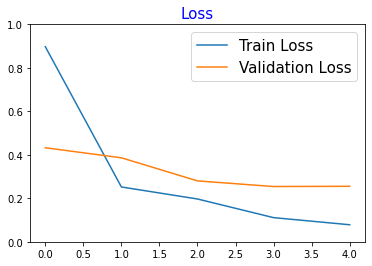

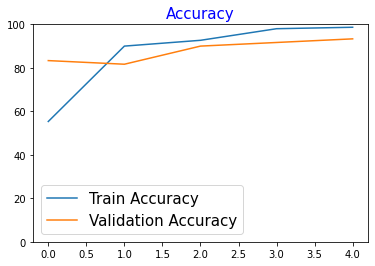

In [ ]:
plot_history(history)

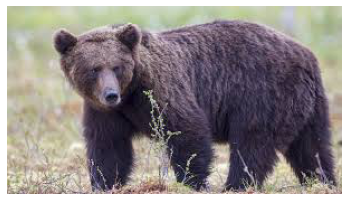

bear , Score:  0.9288994
gorilla , Score:  0.07063421
other , Score:  0.00046643981




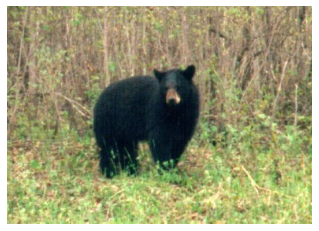

bear , Score:  0.9769519
gorilla , Score:  0.022798974
other , Score:  0.00024911712




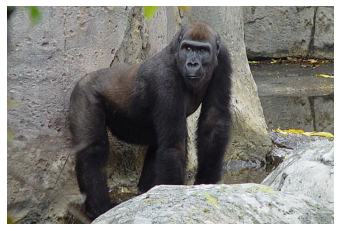

gorilla , Score:  0.99958736
bear , Score:  0.00041243882
other , Score:  2.1422349e-07




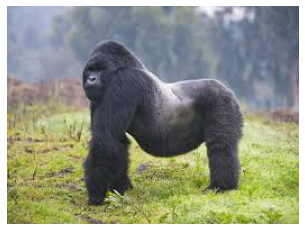

gorilla , Score:  0.96431464
bear , Score:  0.035673827
other , Score:  1.1538178e-05




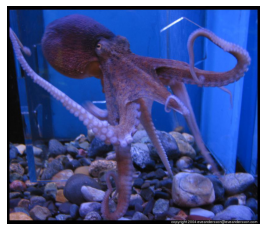

other , Score:  0.976929
bear , Score:  0.016841471
gorilla , Score:  0.0062294938




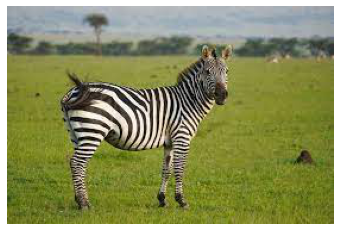

other , Score:  0.9998932
gorilla , Score:  8.965412e-05
bear , Score:  1.7160106e-05




In [ ]:
classes = {v: k for k, v in train_data.class_to_idx.items()}
predict(trained_model, 'drive/MyDrive/images/test/bear1.jpg', classes)
predict(trained_model, 'drive/MyDrive/images/test/bear2.jpg', classes)
predict(trained_model, 'drive/MyDrive/images/test/gorilla1.jpg', classes)
predict(trained_model, 'drive/MyDrive/images/test/gorilla2.jpg', classes)
predict(trained_model, 'drive/MyDrive/images/test/other1.jpg', classes)
predict(trained_model, 'drive/MyDrive/images/test/other2.jpg', classes)

# Part 3 : Segmentaion

In [ ]:
def segmentation(model, image):
  preprocess = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])])
  with torch.no_grad():
      output = model(preprocess(image).unsqueeze(0))['out'][0]
  output_predictions = output.argmax(0)
  segmented_image = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(image.size)

  plt.figure()
  plt.imshow(image)
  plt.axis('off')
  plt.title("Original Image", fontsize = 20, color = "b")

  plt.figure()
  plt.imshow(segmented_image)
  plt.axis('off')
  plt.title("Segmented Image", fontsize = 20, color = "b")

**FCN**

In [38]:
# model_FCN = torch.hub.load('pytorch/vision:v0.10.0', 'fcn_resnet50', pretrained = True)
# or
model_FCN = torch.hub.load('pytorch/vision:v0.10.0', 'fcn_resnet101', pretrained = True)
model_FCN.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

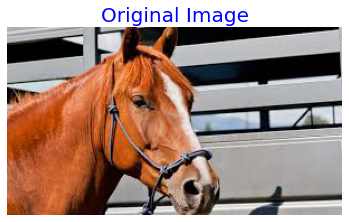

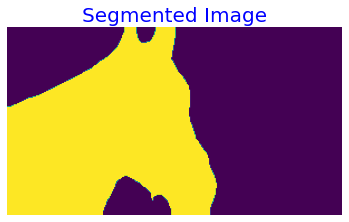

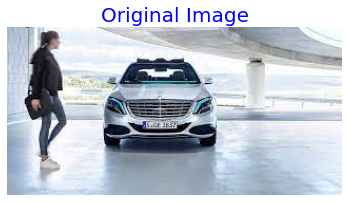

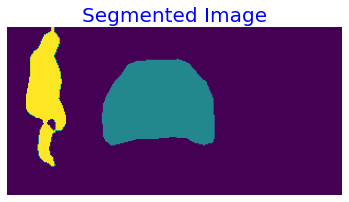

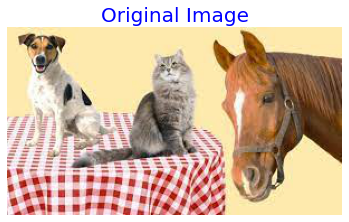

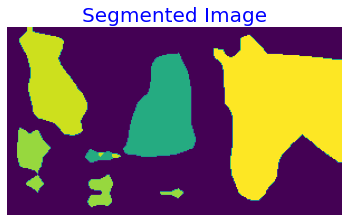

In [45]:
image = Image.open("horse.jfif")
segmentation(model_FCN, image)

image = Image.open("car_human.jfif")
segmentation(model_FCN, image)


image = Image.open("horse_cat_dog.jfif")
segmentation(model_FCN, image)

**DeepLab**

In [36]:
# model_DL = models.segmentation.deeplabv3_resnet101(pretrained = True)
# or
model_DL = models.segmentation.deeplabv3_resnet50(pretrained = True)
model_DL.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

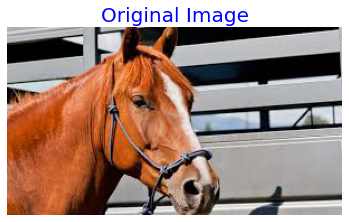

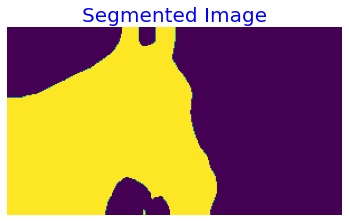

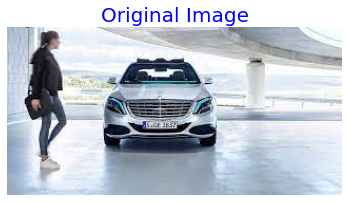

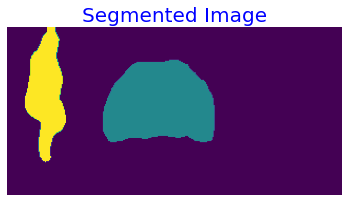

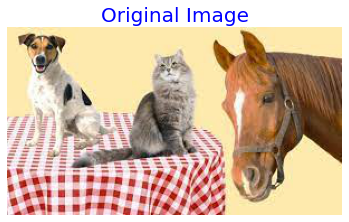

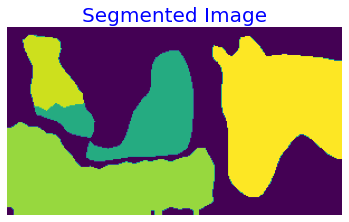

In [46]:
image = Image.open("horse.jfif")
segmentation(model_DL, image)

image = Image.open("car_human.jfif")
segmentation(model_DL, image)


image = Image.open("horse_cat_dog.jfif")
segmentation(model_DL, image)